### dari buat VSM sampe bentuk model

In [1]:
import pandas as pd
databersih=pd.read_csv('C:/WinPython_64bit/notebooks/analisis gopay/perbulan/gabungan_bersih _labeled.csv')

In [2]:
databersih.head()

,Username,Time,Tweet,Label,Cleaned_Tweet
0,@gagalselingkuh,30-Oct-18,bismillah...\n\nmau Rp 50.000 dalam bentuk G...,0,bismillah rp 50.00 bentuk pulsa bebas pil...
1,@askmenfess,30-Oct-18,[askmf] siapa yg mau saldo gopay? https://twit...,0,askmf saldo
2,@muoonlight,30-Oct-18,GA gopay & pulsa all operator masing2 10k. \n\...,0,pulsa all operator masing2 10k rulesnya rt twe...
3,@AsikinHidup,30-Oct-18,"Sambil nungguin gue topup gopay, gimana kalo g...",0,nungguin gue topup gimana terakir hari
4,@dreamyoonjh,30-Oct-18,[GIVEAWAY]\nKarena hari ini aku ultah dan dium...,0,hari ultah diumumkan superstar pledis saldo ...


In [3]:
tweet=databersih['Cleaned_Tweet']

In [4]:
#Membentuk VSM

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2)) #ngram itu feature selection
vsm = vectorizer.fit_transform(tweet)
vsm = vsm[vsm.getnnz(1)>0][:,vsm.getnnz(0)>0]
vsm.shape # bentuk vsm dari kolom 'tweet' csv bersih

(470, 7156)

In [5]:
print(vsm)

  (0, 1266)	0.21593537232372748
  (0, 5539)	0.1927720032850946
  (0, 326)	0.16567259872916326
  (0, 4)	0.21593537232372748
  (0, 1066)	0.1853150640193146
  (0, 5292)	0.21593537232372748
  (0, 957)	0.20238567004576177
  (0, 5111)	0.21593537232372748
  (0, 2017)	0.21593537232372748
  (0, 4057)	0.20238567004576177
  (0, 7003)	0.21593537232372748
  (0, 3954)	0.21593537232372748
  (0, 352)	0.17922230100712894
  (0, 5402)	0.21593537232372748
  (0, 5477)	0.20238567004576177
  (0, 509)	0.21593537232372748
  (0, 5459)	0.21593537232372748
  (0, 2858)	0.21593537232372748
  (0, 1534)	0.21593537232372748
  (0, 1535)	0.21593537232372748
  (0, 1711)	0.21593537232372748
  (0, 4496)	0.21593537232372748
  (0, 7015)	0.21593537232372748
  (1, 704)	1.0
  (2, 5291)	0.30534823184339877
  :	:
  (469, 5730)	0.15875934795201257
  (469, 1981)	0.15875934795201257
  (469, 2042)	0.15875934795201257
  (469, 6352)	0.15875934795201257
  (469, 171)	0.15875934795201257
  (469, 172)	0.15875934795201257
  (469, 3123)	0.15

In [6]:
X = vsm

### split data train dan test

In [12]:
# Split data menjadi data train dan test

from sklearn.model_selection import train_test_split
#X = databersih.Cleaned_Tweet #dari csv gabungan_bersih yang udah dilabelin aja
y = databersih.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(329, 7156)
(141, 7156)
(329,)
(141,)


### bentuk model

In [44]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, rf_prediction))
print(confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test, rf_prediction))
# Ensemble less effective on strong classifiers

Akurasi =  0.5177304964539007
[[ 0 11  2]
 [ 0 61  3]
 [ 0 52 12]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.49      0.95      0.65        64
           1       0.71      0.19      0.30        64

   micro avg       0.52      0.52      0.52       141
   macro avg       0.40      0.38      0.32       141
weighted avg       0.54      0.52      0.43       141



c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train.toarray(), y_train)
nbc_prediction = nbc.predict(X_test.toarray())

print('Akurasi = ', accuracy_score(y_test, nbc_prediction))
print(confusion_matrix(y_test, nbc_prediction))
print(classification_report(y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

Akurasi =  0.5815602836879432
[[ 5  4  4]
 [12 39 13]
 [19  7 38]]
              precision    recall  f1-score   support

          -1       0.14      0.38      0.20        13
           0       0.78      0.61      0.68        64
           1       0.69      0.59      0.64        64

   micro avg       0.58      0.58      0.58       141
   macro avg       0.54      0.53      0.51       141
weighted avg       0.68      0.58      0.62       141



In [42]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
y_DT = DT.predict(X_test)
DT_prediction = DT.predict(X_test.toarray())
print(accuracy_score(y_test, y_DT))
print(confusion_matrix(y_test, DT_prediction))
print(classification_report(y_test, DT_prediction))
# Akurasi relatif rendah ==> Mengapa?

0.574468085106383
[[ 0 10  3]
 [ 0 55  9]
 [ 0 38 26]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.53      0.86      0.66        64
           1       0.68      0.41      0.51        64

   micro avg       0.57      0.57      0.57       141
   macro avg       0.41      0.42      0.39       141
weighted avg       0.55      0.57      0.53       141



c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
#weighted Decision Tree
from sklearn.tree import DecisionTreeClassifier
T = DecisionTreeClassifier()
del T
T = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
T.fit(X_train,y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

Akurasi  (Weighted Decision tree) =  0.6170212765957447
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.84      0.42      0.56        64
           1       0.55      0.94      0.69        64

   micro avg       0.62      0.62      0.62       141
   macro avg       0.46      0.45      0.42       141
weighted avg       0.63      0.62      0.57       141



c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [14]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)

In [15]:
y_kNN

array([ 0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0, -1,  1,  0,  1,  0,  0,  0,  1, -1,
        1,  0,  1,  1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  1,  1,  1,  1,  0,
        1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,
        0,  0,  1,  1, -1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,
        1,  0,  0,  0,  1], dtype=int64)

In [16]:
# confusion matrix/cross validation

# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_kNN)
# Untuk data teks seperti ini ternyata cukup baik
# k-NN cocok untuk aplikasi seperti apakah?

0.6666666666666666

In [17]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 5
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [18]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [19]:
# confusion matrix/cross validation

# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_kNN)
# Untuk data teks seperti ini ternyata cukup baik
# k-NN cocok untuk aplikasi seperti apakah?

0.6808510638297872

In [20]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 7
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [21]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [22]:
# confusion matrix/cross validation

# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_kNN)
# Untuk data teks seperti ini ternyata cukup baik
# k-NN cocok untuk aplikasi seperti apakah?

0.6879432624113475

kita pake k=7 dengan akurasi 68,8 mendekati 69%

In [23]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 8
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [24]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [25]:
# confusion matrix/cross validation

# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_kNN)
# Untuk data teks seperti ini ternyata cukup baik
# k-NN cocok untuk aplikasi seperti apakah?

0.6453900709219859

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN)) # TAPI GAK BISA BACANYA ><

[[ 0  6  7]
 [ 0 48 16]
 [ 0 21 43]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.64      0.75      0.69        64
           1       0.65      0.67      0.66        64

   micro avg       0.65      0.65      0.65       141
   macro avg       0.43      0.47      0.45       141
weighted avg       0.59      0.65      0.61       141



c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### karena akurasi menurun dari k=7 ke 8, maka kita gunakan k=7 untuk model pada data ini

In [27]:
# TESTING

from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report



n_neighbors = 7
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

model = kNN.fit(X_train.toarray(), y_train)
y_model = model.predict(vsm.toarray())

positif_model = []
negative_model = []
netral_model = []
for i in range(len(y_model)):
    if y_model[i] == -1: 
        negative_model.append(tweet[i])
    elif y_model[i] == 0:
        netral_model.append(tweet[i])
    else:
        positif_model.append(tweet[i])
        
print('banyaknya tweet yang positif yaitu :',len(positif_model))
print('banyaknya tweet yang negatif yaitu :',len(negative_model))
print('banyaknya tweet yang netral yaitu :',len(netral_model))

banyaknya tweet yang positif yaitu : 188
banyaknya tweet yang negatif yaitu : 28
banyaknya tweet yang netral yaitu : 254


Percentage of positive tweets: 40.0%
Percentage of neutral tweets: 54.04255319148936%
Percentage of negative tweets: 5.957446808510638%


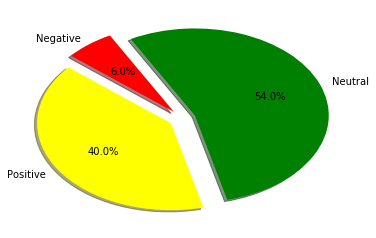

In [35]:
import matplotlib.pyplot as plt

def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['yellow','green','red']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()
    
pos_tweets = [ tweet for index, tweet in enumerate(databersih['Cleaned_Tweet']) if y_model[index] == 1]
neu_tweets = [ tweet for index, tweet in enumerate(databersih['Cleaned_Tweet']) if y_model[index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(databersih['Cleaned_Tweet']) if y_model[index] == -1]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(databersih)))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(databersih)))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(databersih)))

showPieChart(positive=len(pos_tweets),neutral=len(neu_tweets),negative=len(neg_tweets))
#print(matplotlib.get_backend())

In [29]:
#Save to CSV
import pandas as pd

my_df = pd.DataFrame(positif_model)
my_df.to_csv('positif.csv', index=False, header= 'Tweet')

my_df = pd.DataFrame(negative_model)
my_df.to_csv('negatif.csv', index=False, header='Tweet')

my_df = pd.DataFrame(netral_model)
my_df.to_csv('netral.csv', index=False, header='Tweet')

### wordcloud-nya

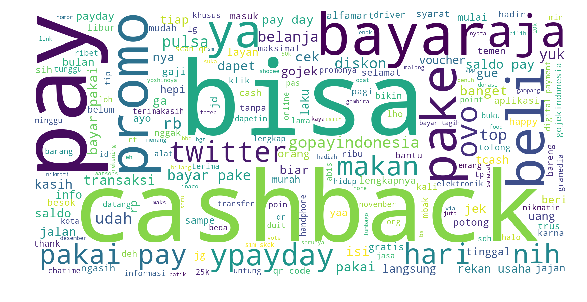

In [30]:
# ni WC positif

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = open('C:/WinPython_64bit/notebooks/analisis gopay/positif.csv')
data = text.read()

%matplotlib inline

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=800).generate(data)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

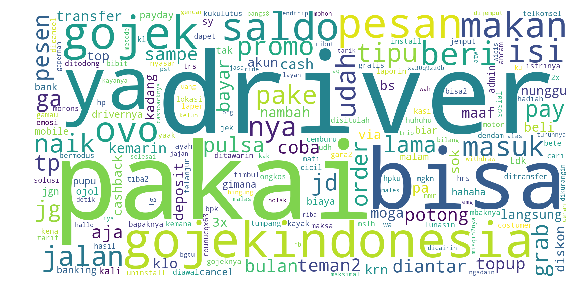

In [31]:
# ni WC negatif

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = open('C:/WinPython_64bit/notebooks/analisis gopay/negatif.csv')
data = text.read()

%matplotlib inline

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=800).generate(data)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
import pandas as pd

Xnew=databersih['Cleaned_Tweet']
Xnew.as_matrix()

array(['bismillah   rp 50.00 bentuk    pulsa bebas pilih dua menang ya masing2 50 rb retweet aja reply impi    cita cita deadlinenya november ya pilih',
       'askmf saldo',
       'pulsa all operator masing2 10k rulesnya rt tweet tweet quote',
       'nungguin gue topup gimana   terakir hari',
       'hari ultah diumumkan superstar pledis   saldo pay 40 rb  one winner only rt    like this tweet  follow me cek yaa   doain   close november',
       'tips pakai gojek grab    topup cash malas nolak bisa ngasih tips 25 rb  jemput suka akurat lokasinya peta bisa coba add place google maps kos kosan',
       'platform bayar digital pay ovo gencar laku promosi penetrasi jurus bakar uang jimat tarik hati konsumen oatqptnceq',
       'quick saldo 10 rb gaada match headernya gpp gopaynya jadiin   rules    rt follow account diumumin pas kerja sore',
       ' syarat rt like ngedapetin pulsa senilai 50 rb orang menang lumbago beli sang pisang kaesangp  jumat nov jam 11 siang pas pesen maksi gojeki

# predict pake data baru

Xnew = pd.read_excel('C:/WinPython_64bit/notebooks/analisis gopay/perbulan/gabungan_bersih _unlabeled.xlsx')
#ynew = kNN.predict(Xnew)
Xnew.as_matrix()

In [33]:
kNN.predict(X_test)

ValueError: kd_tree does not work with sparse matrices. Densify the data, or set algorithm='brute'

In [ ]:
ynew = kNN.predict(Xnew)
ynew.as_matrix()

kesimpulan:
    data ini banyak netral karena banyak yang bahas tentang give away gopay, yang tidak mengandung makna sentimen.  bisa dilanjutkan kembali penelitian dengan model lain, atau membandingkan beberapa model machine learning. namun di sini saya membatasi pada model kNN saja, dengan k=7. juga pada kNN, tidak ada k optimal karena setiap data akan menggunakan k berbeda2 (jika menggunakan model kNN).

dengan sentimen seperti di WC, masyarakat senang dengan gopay karena cashback yang ditawarkan. mungkin pihak gopay bisa mengambil hati masyarakat yg belum menggunakan gopay dengan memberikan promo cashback bagi pengguna baru.

namun sentimen negatif yang diterima adalah tentang driver gojek, seperti mengcancel, meminta isi gopay pada driver (lihat di voyant), juga kritik dengan mention ke gojekindonesia